In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


Text(0, 0.5, 'x2')

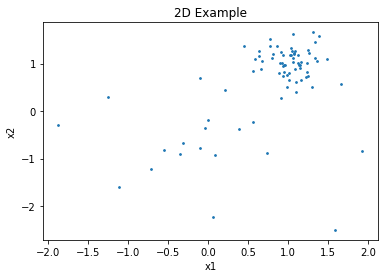

In [2]:
N = 80
N_out = 20
k = 2


np.random.seed(1)
X = np.random.normal([1, 1], [0.3, 0.3], size=(N,k)) 

for i in range(N_out):
    for j in range(k):
        X[i,j] = np.random.normal(-0.6, 1, size=(1,1)) #(N_out/N *100)%  of data will be recentered at (3,3)


plt.scatter(X[:, 0], X[:, 1], s=3)
plt.title(f"2D Example")
plt.xlabel("x1")
plt.ylabel("x2")

[0.94244933 0.73371131]
[0.77521321 0.61960818]


NameError: name 'ax' is not defined

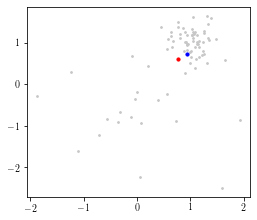

In [3]:
import matplotlib.pylab as pl
from matplotlib import rc
rc('text', usetex=True)

colors_positive = pl.cm.Reds(np.linspace(0,1, 100))
colors_negative = pl.cm.Blues(np.linspace(0, 1, 100))

plt.figure(figsize=(4,3.5))
plt.scatter(X[:, 0], X[:, 1], s=3, c='#c7c7c7')

dis = np.zeros((len(X), len(X)))
for i in range(len(X)):
    for j in range(len(X)):
        dis[i][j] = np.sum((X[i]-X[j])**2)

sum_dis = np.zeros(len(X))
for i in range(len(X)):
    sum_dis[i] = np.sum(dis[i])
    
g_mean_i = np.argmin(sum_dis)
g_mean = X[g_mean_i]
print(g_mean)


        

plt.scatter(g_mean[0], g_mean[1], s = 10, c='blue', label=r'g mean')

mean_ = np.mean(X, axis=0)
print(mean_)
plt.scatter(mean_[0], mean_[1], s=10, c='red')

    
    
ax.tick_params(color='#dddddd')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['top'].set_color('#dddddd')
ax.spines['right'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
        
plt.title(f"mean estimation", fontsize=17)
plt.xlabel(r"$x_1$",fontsize=17)
plt.ylabel(r"$x_2$",fontsize=17)
#plt.xlim(-1, 2)
#plt.ylim(0, 1.5)
plt.tight_layout()
plt.savefig("1-mean_estimation.pdf")


In [4]:
MAX_iter = 10000
thresh = 1e-4
alpha = 0.005
t_step=5



thetas = []
max_=[]
min_=[]
avg_=[]
var_=[]
ts=[]
idx = 0
for t in -1*np.flip(np.logspace(0.1, 1, 10)):
    ts.append(t)
    theta = np.zeros(2)
    print("t=",t)
    for _ in range(MAX_iter):
        loss = np.dot(theta, theta) - 2* np.dot(X, theta)
        grad = np.dot(np.exp(t*loss), 2 * theta - 2 * X)
        ZZ = np.sum(np.exp(t*loss))
        theta = theta - 0.001 * grad / ZZ
    print(idx, theta)
    thetas.append([theta[0], theta[1]])
    
    
    print("t={}, max loss: {}, min loss: {}, avg loss: {}, variance: {}".format(t, max(loss), min(loss), np.mean(loss), np.var(loss)))
    avg_.append(np.mean(loss))
    max_.append(max(loss))
    min_.append(min(loss))
    var_.append(np.var(loss))
    idx += 1
    
for t in -1*np.flip(np.logspace(-1, 0.1, 40)):
    ts.append(t)
    theta = np.zeros(2)
    print("t=",t)
    for _ in range(MAX_iter):
        loss = np.dot(theta, theta) - 2* np.dot(X, theta)
        grad = np.dot(np.exp(t*loss), 2 * theta - 2 * X)
        ZZ = np.sum(np.exp(t*loss))
        theta = theta - 0.01 * grad / ZZ
    print(idx, theta)
    thetas.append([theta[0], theta[1]])
    
    print("t={}, max loss: {}, min loss: {}, avg loss: {}, variance: {}".format(t, max(loss), min(loss), np.mean(loss), np.var(loss)))
    avg_.append(np.mean(loss))
    max_.append(max(loss))
    min_.append(min(loss))
    var_.append(np.var(loss))
    idx += 1

for t in -1*np.flip(np.logspace(-2, -1, 10)):
    ts.append(t)
    theta = np.zeros(2)
    print("t=",t)
    for _ in range(MAX_iter):
        loss = np.dot(theta, theta) - 2* np.dot(X, theta)
        grad = np.dot(np.exp(t*loss), 2 * theta - 2 * X)
        ZZ = np.sum(np.exp(t*loss))
        theta = theta - 0.01 * grad / ZZ
    print(idx, theta)
    thetas.append([theta[0], theta[1]])
    
    print("t={}, max loss: {}, min loss: {}, avg loss: {}, variance: {}".format(t, max(loss), min(loss), np.mean(loss), np.var(loss)))
    avg_.append(np.mean(loss))
    max_.append(max(loss))
    min_.append(min(loss))
    var_.append(np.var(loss))
    idx += 1
    
for t in np.logspace(-2, 2, 60):
    ts.append(t)
    theta = np.zeros(2)
    print("t=",t)
    for _ in range(MAX_iter):
        loss = np.dot(theta, theta) - 2* np.dot(X, theta)
        grad = np.dot(np.exp(t*loss), 2 * theta - 2 * X)
        ZZ = np.sum(np.exp(t*loss))
        theta = theta - 0.001 * grad / ZZ
    print(theta)
    thetas.append([theta[0], theta[1]])
    
    print("t={}, max loss: {}, min loss: {}, avg loss: {}, variance: {}".format(t, max(loss), min(loss), np.mean(loss), np.var(loss)))
    avg_.append(np.mean(loss))
    max_.append(max(loss))
    min_.append(min(loss))
    var_.append(np.var(loss))
    

t= -10.0
0 [1.34235156 1.62698084]
t=-10.0, max loss: 12.644705422179694, min loss: -4.461275520464554, avg loss: 0.35157576823605546, variance: 16.256070931646878
t= -7.943282347242816
1 [1.34300992 1.62542501]
t=-7.943282347242816, max loss: 12.637914638890026, min loss: -4.461141647728523, avg loss: 0.34919077713356755, variance: 16.241377482770083
t= -6.309573444801933
2 [1.34286813 1.62320021]
t=-6.309573444801933, max loss: 12.62288334650643, min loss: -4.461009107412839, avg loss: 0.34455924753036055, variance: 16.21124891286052
t= -5.011872336272724
3 [1.34137467 1.61953288]
t=-5.011872336272724, max loss: 12.591932068565086, min loss: -4.46084541727825, avg loss: 0.3355183868237178, variance: 16.15104527948796
t= -3.9810717055349722
4 [1.33770315 1.612697  ]
t=-3.9810717055349722, max loss: 12.529963616063817, min loss: -4.460503643067274, avg loss: 0.31775052100907153, variance: 16.031682849418402
t= -3.1622776601683795
5 [1.33022244 1.59850028]
t=-3.1622776601683795, max los

43 [0.91840395 0.826981  ]
t=-0.1476490881614259, max loss: 6.220672985606665, min loss: -3.6413534545845794, avg loss: -0.9213627422369038, variance: 5.309538404093276
t= -0.13836480680324598
44 [0.91061121 0.81492969]
t=-0.13836480680324598, max loss: 6.1307298058578255, min loss: -3.6155262553586587, avg loss: -0.9283867042712185, variance: 5.184121883610782
t= -0.12966432776590128
45 [0.90309965 0.80340256]
t=-0.12966432776590128, max loss: 6.044850763593741, min loss: -3.5903816368701706, avg loss: -0.9347344999774012, variance: 5.065304006133509
t= -0.12151094113758888
46 [0.89588402 0.79241063]
t=-0.12151094113758888, max loss: 5.963099018488365, min loss: -3.5660004740035607, avg loss: -0.940447683086421, variance: 4.953051619477404
t= -0.11387024535228739
47 [0.88897403 0.78195767]
t=-0.11387024535228739, max loss: 5.8854833318251645, min loss: -3.542446531266532, avg loss: -0.9455709325742706, variance: 4.847258776644884
t= -0.10671000203930622
48 [0.88237497 0.77204117]
t=-0

[0.36230715 0.18043309]
t=0.6768750009458534, max loss: 1.6240763457884206, min loss: -1.411510588408023, avg loss: -0.6215036437292731, variance: 0.4787636406394721
t= 0.7912342618981323
[0.33117062 0.15719513]
t=0.7912342618981323, max loss: 1.4647149706595095, min loss: -1.2809768139367033, avg loss: -0.573870163175682, variance: 0.38648144757892033
t= 0.9249147277217336
[0.30095804 0.13601223]
t=0.9249147277217336, max loss: 1.3141203276501818, min loss: -1.155403673241099, avg loss: -0.5260868128584507, variance: 0.3085897308161875
t= 1.0811807510766078
[0.27198659 0.11696855]
t=1.0811807510766078, max loss: 1.173291882060516, min loss: -1.0361720546057036, avg loss: -0.4789861809144128, variance: 0.24393221753277122
t= 1.2638482029342986
[0.24451131 0.10006126]
t=1.2638482029342986, max loss: 1.0428471784985827, min loss: -0.9243141529911751, avg loss: -0.4332963103210032, variance: 0.19106627641385263
t= 1.4773776525985112
[0.21872258 0.0852174 ]
t=1.4773776525985112, max loss: 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[0.94244933 0.73371131]
[0.77521321 0.61960818]


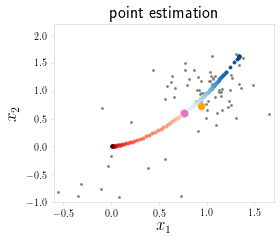

In [5]:
import matplotlib.pylab as pl
from matplotlib import rc
rc('text', usetex=True)

tot = len(thetas)
colors_positive = pl.cm.Reds(np.linspace(0,1, int(tot/2)))
colors_negative = pl.cm.Blues(np.linspace(0, 1, int(tot/2)))

plt.figure(figsize=(4,3.5))
plt.scatter(X[:, 0], X[:, 1], s=3, c='#7f7f7f')


ax = plt.subplot(1, 1, 1)

for j in range(tot):
    if j > tot/2+10:
        plt.scatter(thetas[j][0], thetas[j][1], s = 8, c = colors_positive[j-int(tot/2)])
    elif j < tot/2:
        plt.scatter(thetas[j][0], thetas[j][1], s = 8, c = colors_negative[int(tot/2)-1-j])
    elif j == tot/2:
        plt.scatter(thetas[j][0], thetas[j][1], s = 50, c = '#e377c2', label=r'$t \to 0$')
    
dis = np.zeros((len(X), len(X)))
for i in range(len(X)):
    for j in range(len(X)):
        dis[i][j] = np.sum((X[i]-X[j])**2)

sum_dis = np.zeros(len(X))
for i in range(len(X)):
    sum_dis[i] = np.sum(dis[i])
    
g_mean_i = np.argmin(sum_dis)
g_mean = X[g_mean_i]
print(g_mean)

plt.scatter(g_mean[0], g_mean[1], s = 40, c='orange', label=r'g mean')

mean_ = np.mean(X, axis=0)
print(mean_)

ax.tick_params(color='#dddddd')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['top'].set_color('#dddddd')
ax.spines['right'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')
        
plt.title(f"point estimation", fontsize=17)
plt.xlabel(r"$x_1$",fontsize=17)
plt.ylabel(r"$x_2$",fontsize=17)
plt.xlim(-0.6, 1.7)
plt.ylim(-1, 2.2)
plt.tight_layout()
plt.savefig("1-mean_estimation.pdf")


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


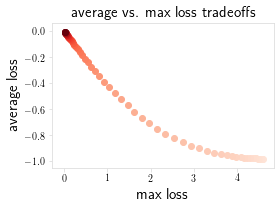

In [6]:
import matplotlib.pylab as pl
from matplotlib import rc
rc('text', usetex=True)

colors_positive = pl.cm.Reds(np.logspace(-1, 0, 60))
colors_negative = pl.cm.Blues(np.logspace(-1, 0, 60))


plt.figure(figsize=(4, 3))
ax = plt.subplot(1, 1, 1)

i = 0
for idx in range(60, len(avg_)):
    col = colors_positive[i-60]
    plt.scatter(max_[idx], avg_[idx], c=col)
    i += 1
    
plt.ylabel(r"average loss", fontsize=15)
plt.xlabel("max loss", fontsize=15)
plt.title("average vs. max loss tradeoffs", fontsize=15)


    
ax.tick_params(color='#dddddd')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['top'].set_color('#dddddd')
ax.spines['right'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')

plt.tight_layout()
plt.savefig("loss_tradeoff_linear.pdf")


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


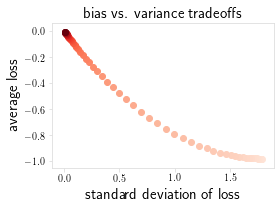

In [7]:
import matplotlib.pylab as pl
from matplotlib import rc
rc('text', usetex=True)

colors_positive = pl.cm.Reds(np.logspace(-1, 0, 60))
colors_negative = pl.cm.Blues(np.logspace(-1, 0.15, 60))



plt.figure(figsize=(4, 3))
ax = plt.subplot(1, 1, 1)

i = 0
for idx in range(60, len(avg_)):
    col = colors_positive[i-60]
    plt.scatter(np.sqrt(var_[idx]), avg_[idx], c=col)
    i += 1
    

plt.ylabel(r"average loss", fontsize=15)
plt.xlabel("standard deviation of loss", fontsize=15)
plt.title("bias vs. variance tradeoffs", fontsize=15)

#plt.xscale('log')
    
ax.tick_params(color='#dddddd')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['top'].set_color('#dddddd')
ax.spines['right'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')

plt.tight_layout()
plt.savefig("avg_loss_variance.pdf")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

-3.0888742509208447
-3.082160851199932
-3.074309898371909
-3.065128876523443
-3.0543931396126656
-3.0418409197386023
-3.027167811403136
-3.010020841276642
-2.9899923591650954
-2.9666141817477873
-2.93935271079843
-2.9076061550682324
-2.8707055191749014
-2.8279216561078213
-2.7784813104825736
-2.7215954843863877
-2.656503257115833
-2.5825328748238614
-2.4991790174463855
-2.4061905453558974
-2.3036574496117783
-2.192080976528235
-2.072409454364119
-1.9460261756815627
-1.8146847341696077
-1.6803988341025125
-1.54530362559703
-1.411510588408023
-1.2809768139367033
-1.155403673241099
-1.0361720546057036
-0.9243141529911751
-0.820516681850373
-0.7251477156141083
-0.6382987760732288
-0.5598345701302475
-0.4894443058516608
-0.42669025008095796
-0.37105081879279533
-0.3219568407280785
-0.278820646714149
-0.2410583224981687
-0.20871726650218253
-0.18059774998251604
-0.1560270129119877
-0.13461857951608355
-0.11601199951714751
-0.09987570596678683
-0.08590814054351643
-0.07383760565623526
-0.0634

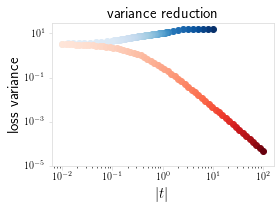

In [8]:
import matplotlib.pylab as pl
from matplotlib import rc
rc('text', usetex=True)

colors_positive = pl.cm.Reds(np.logspace(-1, 0, 60))
colors_negative = pl.cm.Blues(np.logspace(-1, 0, 60))



plt.figure(figsize=(4, 3))
ax = plt.subplot(1, 1, 1)


for idx in range(len(avg_)):
    if idx < 60:
        col = colors_negative[59-idx]
        plt.scatter(-1*ts[idx], var_[idx], c=col)
    else:
        col = colors_positive[idx-60]
        plt.scatter(ts[idx], var_[idx], c=col)
        print(min_[idx])
        

plt.ylabel(r"loss variance", fontsize=15)
plt.xlabel(r"$|t|$", fontsize=15)
plt.title("variance reduction", fontsize=15)

plt.yscale("log")
plt.xscale("log")
ax.tick_params(color='#dddddd')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['top'].set_color('#dddddd')
ax.spines['right'].set_color('#dddddd')
ax.spines['left'].set_color('#dddddd')

plt.tight_layout()
plt.ylim(1e-5, 30)
plt.savefig("loss_variance_linear_rerun.pdf")